#### Introduction
The advancements in Data Science and Machine Learning have made it possible for us to solve several complex regression and classification problems.  However, the performance of all these ML models depends on the data fed to them. Thus, it is imperative that we provide our ML models with an optimal dataset. Now, one might think that the more data we provide to our model, the better it becomes - however, it is not the case. If we feed our model with an excessively large dataset (with a large no. of features/columns), it gives rise to the problem of overfitting, wherein the model starts getting influenced by outlier values and noise. This is called the Curse of Dimensionality.

The following graph represents the change in model performance with the increase in the number of dimensions of the dataset. It can be observed that the model performance is best only at an option dimension, beyond which it starts decreasing.

#### Dimensionality Reduction is a statistical/ML-based technique wherein we try to reduce the number of features in our dataset and obtain a dataset with an optimal number of dimensions.

One of the most common ways to accomplish Dimensionality Reduction is Feature Extraction, wherein we reduce the number of dimensions by mapping a higher dimensional feature space to a lower-dimensional feature space. The most popular technique of Feature Extraction is Principal Component Analysis (PCA)

Principal Component Analysis (PCA)
As stated earlier, Principal Component Analysis is a technique of feature extraction that maps a higher dimensional feature space to a lower-dimensional feature space. While reducing the number of dimensions, PCA ensures that maximum information of the original dataset is retained in the dataset with the reduced no. of dimensions and the co-relation between the newly obtained Principal Components is minimum. The new features obtained after applying PCA are called Principal Components and are denoted as PCi (i=1,2,3...n). Here, (Principal Component-1) PC1 captures the maximum information of the original dataset, followed by PC2, then PC3 and so on.

The following bar graph depicts the amount of Explained Variance captured by various Principal Components. (The Explained Variance defines the amount of information captured by the Principal Components).

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


iris=load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

# Standardizing the data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df))
scaled_data



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\royal\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\royal\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\royal\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\royal\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\royal\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\royal\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


<Axes: >

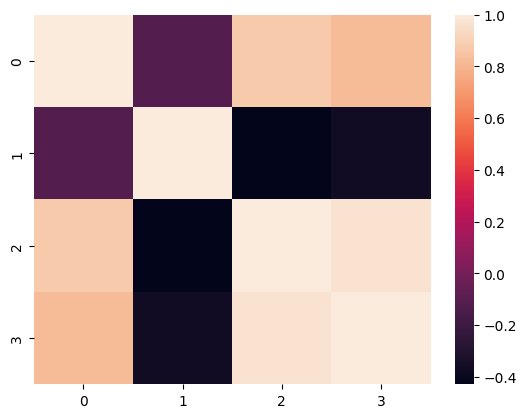

In [3]:
import seaborn as sns
sns.heatmap(scaled_data.corr())

In [4]:
# Applying PCA
pca = PCA(n_components=3)
pca.fit(scaled_data)
data_pca=pca.transform(scaled_data)
data_pca=pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


### The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1, PC2, and PC3). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum. Hence, we have accomplished the objectives of PCA

<Axes: >

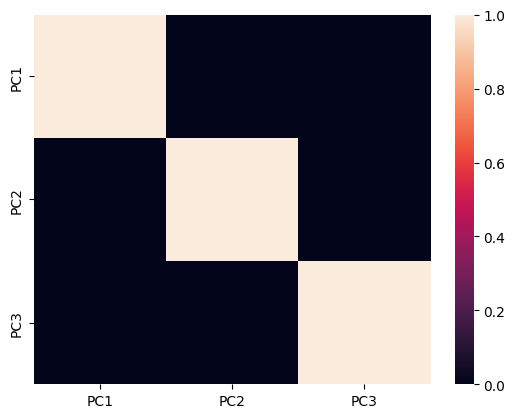

In [5]:
sns.heatmap(data_pca.corr())


Text(0, 0.5, 'Explained Variance')

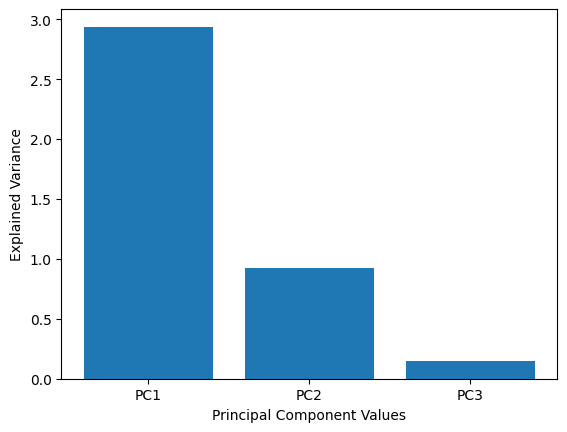

In [11]:
import matplotlib.pyplot as plt

plt.bar(data_pca.columns, pca.explained_variance_)
plt.xlabel('Principal Component Values')
plt.ylabel('Explained Variance')